# Prepatory Functions

In [1]:
# Create the game board
board = [[' ' for _ in range(7)] for _ in range(6)]

In [2]:
# Function to print the game board
def print_board(board):
    for row in board:
        print("|", end=" ")
        for cell in row:
            print(cell, end=" | ")
        print()
        print("+---+---+---+---+---+---+---+")
    print("  1   2   3   4   5   6   7")



In [3]:
# Function to check if a player has won
def check_win(board, player):
    # Check horizontal
    for row in range(6):
        for col in range(4):
            if board[row][col] == board[row][col + 1] == board[row][col + 2] == board[row][col + 3] == player:
                return True

    # Check vertical
    for col in range(7):
        for row in range(3):
            if board[row][col] == board[row + 1][col] == board[row + 2][col] == board[row + 3][col] == player:
                return True

    # Check diagonal (top left to bottom right)
    for row in range(3):
        for col in range(4):
            if board[row][col] == board[row + 1][col + 1] == board[row + 2][col + 2] == board[row + 3][col + 3] == player:
                return True

    # Check diagonal (top right to bottom left)
    for row in range(3):
        for col in range(3, 7):
            if board[row][col] == board[row + 1][col - 1] == board[row + 2][col - 2] == board[row + 3][col - 3] == player:
                return True

    return False


In [4]:
# Function to check if the game board is full
def is_board_full(board):
    for row in board:
        if ' ' in row:
            return False
    return True

In [5]:
# Function to drop a piece in a column
def drop_piece(board, col, player):
    for row in range(5, -1, -1):
        if board[row][col] == ' ':
            board[row][col] = player
            break

In [6]:
#Reset Board
def reset_board():
    global board
    board = [[' ' for _ in range(7)] for _ in range(6)]
    
reset_board()

#### Block if there are 3 same inputs

In [7]:
import random

def block_three_line(board, current_player):
    opponent = 'X' if current_player == 'O' else 'O' 
    # Check horizontalright
    for row in range(6):
        for col in range(4):
            if (board[row][col] == board[row][col + 1] == board[row][col + 2] == opponent) and (col + 3 < 7 and board[row][col + 3] == ' '):
                return col + 3
            elif (col + 3 < 7 and board[row][col] == board[row][col + 1] == opponent == board[row][col + 3]) and (col + 2 < 7 and board[row][col + 2] == ' '):
                return col + 2
            elif (col + 4 < 7 and board[row][col] == board[row][col + 2] == opponent == board[row][col + 3]) and (col + 1 < 7 and board[row][col + 1] == ' '):
                return col + 1
    #check horizontal left
    for row in range(6):
        for col in range(3, 7):
            if (board[row][col] == board[row][col - 1] == board[row][col - 2] == opponent) and (col - 3 >= 0 and board[row][col - 3] == ' '):
                return col - 3
            elif (col - 3 >= 0 and board[row][col] == board[row][col - 1] == opponent == board[row][col - 3]) and (col - 2 >= 0 and board[row][col - 2] == ' '):
                return col - 2
            elif (col - 4 >= 0 and board[row][col] == board[row][col - 2] == opponent == board[row][col - 3]) and (col - 1 >= 0 and board[row][col - 1] == ' '):
                return col - 1

            
    # Check vertical
    for col in range(7):
        for row in range(3, 6):
            if (board[row][col] == opponent and board[row - 1][col] == opponent and board[row - 2][col] == opponent):
                if row - 3 >= 0 and board[row - 3][col] == ' ':
                    return col
     # Check diagonal (top left to bottom right)
    for row in range(3):
        for col in range(4):
            if (board[row][col] == board[row + 1][col + 1] == board[row + 2][col + 2] == opponent) and (row + 3 < 6 and col + 3 < 7 and board[row + 3][col + 3] == ' '):
                return col + 3
            elif (board[row][col] == board[row + 1][col + 1] == board[row + 3][col + 3] == opponent) and (row + 3 < 6 and col + 3 < 7 and board[row + 2][col + 2] == ' '):
                return col + 2
            elif (board[row][col] == board[row + 2][col + 2] == board[row + 3][col + 3] == opponent) and (row + 3 < 6 and col + 3 < 7 and board[row + 1][col + 1] == ' '):
                return col + 1

    # Check diagonal (top right to bottom left)
    for row in range(3):
        for col in range(3, 7):
            if (board[row][col] == board[row + 1][col - 1] == board[row + 2][col - 2] == opponent) and (row + 3 < 6 and col - 3 >= 0 and board[row + 3][col - 3] == ' '):
                return col - 3
            elif (board[row][col] == board[row + 1][col - 1] == board[row + 3][col - 3] == opponent) and (row + 3 < 6 and col - 3 >= 0 and board[row + 2][col - 2] == ' '):
                return col - 2
            elif (board[row][col] == board[row + 2][col - 2] == board[row + 3][col - 3] == opponent) and (row + 3 < 6 and col - 3 >= 0 and board[row + 1][col - 1] == ' '):
                return col - 1

    # Check diagonal (top left to bottom right) in reverse order
    for row in range(3, 6):
        for col in range(3, 7):
            if (board[row][col] == board[row - 1][col - 1] == board[row - 2][col - 2] == opponent) and (row - 3 >= 0 and col - 3 >= 0 and board[row - 3][col - 3] == ' '):
                return col - 3
            elif (board[row][col] == board[row - 1][col - 1] == board[row - 3][col - 3] == opponent) and (row - 3 >= 0 and col - 3 >= 0 and board[row - 2][col - 2] == ' '):
                return col - 2
            elif (board[row][col] == board[row - 2][col - 2] == board[row - 3][col - 3] == opponent) and (row - 3 >= 0 and col - 3 >= 0 and board[row - 1][col - 1] == ' '):
                return col - 1

    # Check diagonal (top right to bottom left) in reverse order
    for row in range(3, 6):
        for col in range(4):
            if (board[row][col] == board[row - 1][col + 1] == board[row - 2][col + 2] == opponent) and (row - 3 >= 0 and col + 3 < 7 and board[row - 3][col + 3] == ' '):
                return col + 3
            elif (board[row][col] == board[row - 1][col + 1] == board[row - 3][col + 3] == opponent) and (row - 3 >= 0 and col + 3 < 7 and board[row - 2][col + 2] == ' '):
                return col + 2
            elif (board[row][col] == board[row - 2][col + 2] == board[row - 3][col + 3] == opponent) and (row - 3 >= 0 and col + 3 < 7 and board[row - 1][col + 1] == ' '):
                return col + 1
        # Block O X X _
    for row in range(6):
        for col in range(4):
            if (board[row][col] == board[row][col + 1] == opponent) and (col + 2 < 7 and board[row][col + 2] == ' '):
                return col + 2

    # Block _ X X O
    for row in range(6):
        for col in range(3, 7):
            if (board[row][col] == board[row][col - 1] == opponent) and (col - 2 >= 0 and board[row][col - 2] == ' '):
                return col - 2
            

    return None

### Block two output

In [8]:
import random
def block_two_line(board, current_player):
    opponent = 'X' if current_player == 'O' else 'O'
    # Check horizontal
    for row in range(6):
        for col in range(4):
            if (col <= 0 and board[row][col+1] == board[row][col + 2] == opponent) and (col + 3 < 7 and board[row][col + 3] == ' ' == board[row][col]):
                return col if board[row][col] == " " else col + 3
            elif (col <= 0 and board[row][col + 1] == board[row][col + 3] == opponent) and (col + 3 < 7 and board[row][col + 2] == ' ' == board[row][col]):
                return col if board[row][col] == " " else col + 2
            elif (col <= 0 and board[row][col + 1] == board[row][col + 3] == opponent) and (col + 4 < 7 and board[row][col + 2] == ' ' == board[row][col] == board[row][col + 4]):
                return col if board[row][col] == " " else col + 2 if board[row][col + 2] == " " else col + 4
            elif (col <= 0 and board[row][col] == board[row][col + 1] == opponent) and (col + 3 < 7 and board[row][col + 2] == ' ' == board[row][col + 3]):
                return col + 3 if board[row][col + 3] == " " else col + 2
            elif (col <= 0 and board[row][col + 2] == board[row][col + 3] == opponent) and (col + 3 < 7 and board[row][col + 1] == ' ' == board[row][col]):
                return col if board[row][col] == " " else col + 1
            elif (col <= 0 and board[row][col] == board[row][col + 3] == opponent) and (col + 3 < 7 and board[row][col + 1] == ' ' == board[row][col + 2]):
                return col + 1 if board[row][col + 1] == " " else col + 2
            elif (col <= 0 and board[row][col] == board[row][col + 2] == opponent) and (col + 3 < 7 and board[row][col + 1] == ' ' == board[row][col + 3]):
                return col + 1 if board[row][col + 1] == " " else col + 3
            
    # Check vertical
    for col in range(7):
        for row in range(3, 6):
            if (board[row][col] == current_player == board[row - 1][col]):
                if row - 3 >= 0 and board[row - 3][col] == ' ' == board[row - 2][col]:
                    return col

    # Check diagonal (top right to bottom left)
    for row in range(3, 6):
        for col in range(4):
            if (board[row][col] == board[row - 1][col + 1] == opponent) and (row - 3 >= 0 and col + 3 < 7 and board[row - 3][col + 3] == ' ' == board[row - 2][col + 2]):
                return col + 2 if board[row - 2][col + 2] == " " else col + 3
            elif (board[row][col] == board[row - 2][col + 2] == opponent) and (row - 3 >= 0 and col + 3 < 7 and board[row - 2][col + 2] == ' ' == board[row - 1][col + 1]):
                return col + 2 if board[row - 2][col + 2] == " " else col + 1
            elif (board[row - 1][col + 1] == board[row - 2][col + 2] == opponent) and (row - 3 >= 0 and col + 3 < 7 and board[row][col] == ' ' == board[row - 3][col + 3] ):
                return col if board[row][col] == " " else col + 3
            elif (board[row][col] == board[row - 3][col + 3] == current_player) and (row - 3 >= 0 and col + 3 < 7 and board[row - 1][col + 1] == ' ' == board[row - 2][col + 2] ):
                return col + 1 if board[row - 1][col + 1] == " " else col + 2
            elif (board[row - 1][col + 1] == board[row - 3][col + 3] == opponent) and (row - 3 >= 0 and col + 3 < 7 and board[row][col] == ' ' == board[row - 2][col + 2] ):
                return col if board[row][col] == " " else col + 2
            elif (board[row - 2][col + 2] == board[row - 3][col + 3] == opponent) and (row - 3 >= 0 and col + 3 < 7 and board[row][col] == ' ' == board[row - 1][col + 1] ):
                return col if board[row][col] == " " else col + 1 

    # Check diagonal (top left to bottom right)
    for row in range(3):
        for col in range(4):
            if (board[row][col] == board[row + 1][col + 1] == opponent) and (row + 3 < 6 and col + 3 < 7 and board[row + 3][col + 3] == ' ' == board[row + 2][col + 2] ):
                return col + 3 if board[row + 3][col + 3] == " " else col + 2
            elif (board[row][col] == board[row + 2][col + 2] == opponent) and (row + 3 < 6 and col + 3 < 7 and board[row + 1][col + 1] == ' ' == board[row + 3][col + 3] ):
                return col + 1 if board[row + 1][col + 1] == " " else col + 3
            elif (board[row + 1][col + 1] == board[row + 2][col + 2] == opponent) and (row + 3 < 6 and col + 3 < 7 and board[row][col] == ' ' == board[row + 3][col + 3] ):
                return col if board[row][col] == " " else col + 3
            elif (board[row][col] == board[row + 3][col + 3] == opponent) and (row + 3 < 6 and col + 3 < 7 and board[row + 1][col + 1] == ' ' == board[row + 2][col + 2] ):
                return col + 1 if board[row + 1][col + 1] == " " else col + 2
            elif (board[row + 1][col + 1] == board[row + 3][col + 3] == opponent) and (row + 3 < 6 and col + 3 < 7 and board[row][col] == ' ' == board[row + 2][col + 2] ):
                return col if board[row][col] == " " else col + 2
            elif (board[row + 2][col + 2] == board[row + 3][col + 3] == opponent) and (row + 3 < 6 and col + 3 < 7 and board[row][col] == ' ' == board[row + 1][col + 1] ):
                return col if board[row][col] == " " else col + 1

    return None

#### Tries to make it 4 if there are 3 same inputs

In [9]:
import random

def stack_three_line(board, current_player):
    opponent = 'X' if current_player == 'O' else 'O'
    
    # Check horizontalright
    for row in range(6):
        for col in range(4):
            if (board[row][col] == board[row][col + 1] == board[row][col + 2] == current_player) and (col + 3 < 7 and board[row][col + 3] == ' '):
                return col + 3
            elif (col + 3 < 7 and board[row][col] == board[row][col + 1] == current_player == board[row][col + 3]) and (col + 2 < 7 and board[row][col + 2] == ' '):
                return col + 2
            elif (col + 4 < 7 and board[row][col] == board[row][col + 2] == current_player == board[row][col + 3]) and (col + 1 < 7 and board[row][col + 1] == ' '):
                return col + 1
    #check horizontal left
    for row in range(6):
        for col in range(3, 7):
            if (board[row][col] == board[row][col - 1] == board[row][col - 2] == current_player) and (col - 3 >= 0 and board[row][col - 3] == ' '):
                return col - 3
            elif (col - 3 >= 0 and board[row][col] == board[row][col - 1] == current_player == board[row][col - 3]) and (col - 2 >= 0 and board[row][col - 2] == ' '):
                return col - 2
            elif (col - 4 >= 0 and board[row][col] == board[row][col - 2] == current_player == board[row][col - 3]) and (col - 1 >= 0 and board[row][col - 1] == ' '):
                return col - 1

            
    # Check vertical
    for col in range(7):
        for row in range(3, 6):
            if (board[row][col] == current_player and board[row - 1][col] == current_player and board[row - 2][col] == current_player):
                if row - 3 >= 0 and board[row - 3][col] == ' ':
                    return col
                
     # Check diagonal (top left to bottom right)
    for row in range(3):
        for col in range(4):
            if (board[row][col] == board[row + 1][col + 1] == board[row + 2][col + 2] == current_player) and (row + 3 < 6 and col + 3 < 7 and board[row + 3][col + 3] == ' '):
                return col + 3
            elif (board[row][col] == board[row + 1][col + 1] == board[row + 3][col + 3] == current_player) and (row + 3 < 6 and col + 3 < 7 and board[row + 2][col + 2] == ' '):
                return col + 2
            elif (board[row][col] == board[row + 2][col + 2] == board[row + 3][col + 3] == current_player) and (row + 3 < 6 and col + 3 < 7 and board[row + 1][col + 1] == ' '):
                return col + 1

    # Check diagonal (top right to bottom left)
    for row in range(3):
        for col in range(3, 7):
            if (board[row][col] == board[row + 1][col - 1] == board[row + 2][col - 2] == current_player) and (row + 3 < 6 and col - 3 >= 0 and board[row + 3][col - 3] == ' '):
                return col - 3
            elif (board[row][col] == board[row + 1][col - 1] == board[row + 3][col - 3] == current_player) and (row + 3 < 6 and col - 3 >= 0 and board[row + 2][col - 2] == ' '):
                return col - 2
            elif (board[row][col] == board[row + 2][col - 2] == board[row + 3][col - 3] == current_player) and (row + 3 < 6 and col - 3 >= 0 and board[row + 1][col - 1] == ' '):
                return col - 1

    # Check diagonal (top left to bottom right) in reverse order
    for row in range(3, 6):
        for col in range(3, 7):
            if (board[row][col] == board[row - 1][col - 1] == board[row - 2][col - 2] == current_player) and (row - 3 >= 0 and col - 3 >= 0 and board[row - 3][col - 3] == ' '):
                return col - 3
            elif (board[row][col] == board[row - 1][col - 1] == board[row - 3][col - 3] == current_player) and (row - 3 >= 0 and col - 3 >= 0 and board[row - 2][col - 2] == ' '):
                return col - 2
            elif (board[row][col] == board[row - 2][col - 2] == board[row - 3][col - 3] == current_player) and (row - 3 >= 0 and col - 3 >= 0 and board[row - 1][col - 1] == ' '):
                return col - 1

    # Check diagonal (top right to bottom left) in reverse order
    for row in range(3, 6):
        for col in range(4):
            if (board[row][col] == board[row - 1][col + 1] == board[row - 2][col + 2] == current_player) and (row - 3 >= 0 and col + 3 < 7 and board[row - 3][col + 3] == ' '):
                return col + 3
            elif (board[row][col] == board[row - 1][col + 1] == board[row - 3][col + 3] == current_player) and (row - 3 >= 0 and col + 3 < 7 and board[row - 2][col + 2] == ' '):
                return col + 2
            elif (board[row][col] == board[row - 2][col + 2] == board[row - 3][col + 3] == current_player) and (row - 3 >= 0 and col + 3 < 7 and board[row - 1][col + 1] == ' '):
                return col + 1
        # Block O X X _
    for row in range(6):
        for col in range(4):
            if (board[row][col] == board[row][col + 1] == current_player) and (col + 2 < 7 and board[row][col + 2] == ' '):
                return col + 2

    # Block _ X X O
    for row in range(6):
        for col in range(3, 7):
            if (board[row][col] == board[row][col - 1] == current_player) and (col - 2 >= 0 and board[row][col - 2] == ' '):
                return col - 2
            

    return None

#### Tries to make it 3 if there are 2 same inputs

In [10]:
def stack_two_line(board, current_player):
    # Check horizontal
    for row in range(6):
        for col in range(4):
            if (col <= 0 and board[row][col+1] == board[row][col + 2] == current_player) and (col + 3 < 7 and board[row][col + 3] == ' ' == board[row][col]):
                return col if board[row][col] == " " else col + 3
            elif (col <= 0 and board[row][col + 1] == board[row][col + 3] == current_player) and (col + 3 < 7 and board[row][col + 2] == ' ' == board[row][col]):
                return col if board[row][col] == " " else col + 2
            elif (col <= 0 and board[row][col + 1] == board[row][col + 3] == current_player) and (col + 4 < 7 and board[row][col + 2] == ' ' == board[row][col] == board[row][col + 4]):
                return col if board[row][col] == " " else col + 2 if board[row][col + 2] == " " else col + 4
            elif (col <= 0 and board[row][col] == board[row][col + 1] == current_player) and (col + 3 < 7 and board[row][col + 2] == ' ' == board[row][col + 3]):
                return col + 3 if board[row][col + 3] == " " else col + 2
            elif (col <= 0 and board[row][col + 2] == board[row][col + 3] == current_player) and (col + 3 < 7 and board[row][col + 1] == ' ' == board[row][col]):
                return col if board[row][col] == " " else col + 1
            elif (col <= 0 and board[row][col] == board[row][col + 3] == current_player) and (col + 3 < 7 and board[row][col + 1] == ' ' == board[row][col + 2]):
                return col + 1 if board[row][col + 1] == " " else col + 2
            elif (col <= 0 and board[row][col] == board[row][col + 2] == current_player) and (col + 3 < 7 and board[row][col + 1] == ' ' == board[row][col + 3]):
                return col + 1 if board[row][col + 1] == " " else col + 3
            
    # Check vertical
    for col in range(7):
        for row in range(3, 6):
            if (board[row][col] == current_player == board[row - 1][col]):
                if row - 3 >= 0 and board[row - 3][col] == ' ' == board[row - 2][col]:
                    return col

    # Check diagonal (top right to bottom left)
    for row in range(3, 6):
        for col in range(4):
            if (board[row][col] == board[row - 1][col + 1] == current_player) and (row - 3 >= 0 and col + 3 < 7 and board[row - 3][col + 3] == ' ' == board[row - 2][col + 2]):
                return col + 2 if board[row - 2][col + 2] == " " else col + 3
            elif (board[row][col] == board[row - 2][col + 2] == current_player) and (row - 3 >= 0 and col + 3 < 7 and board[row - 2][col + 2] == ' ' == board[row - 1][col + 1]):
                return col + 2 if board[row - 2][col + 2] == " " else col + 1
            elif (board[row - 1][col + 1] == board[row - 2][col + 2] == current_player) and (row - 3 >= 0 and col + 3 < 7 and board[row][col] == ' ' == board[row - 3][col + 3] ):
                return col if board[row][col] == " " else col + 3
            elif (board[row][col] == board[row - 3][col + 3] == current_player) and (row - 3 >= 0 and col + 3 < 7 and board[row - 1][col + 1] == ' ' == board[row - 2][col + 2] ):
                return col + 1 if board[row - 1][col + 1] == " " else col + 2
            elif (board[row - 1][col + 1] == board[row - 3][col + 3] == current_player) and (row - 3 >= 0 and col + 3 < 7 and board[row][col] == ' ' == board[row - 2][col + 2] ):
                return col if board[row][col] == " " else col + 2
            elif (board[row - 2][col + 2] == board[row - 3][col + 3] == current_player) and (row - 3 >= 0 and col + 3 < 7 and board[row][col] == ' ' == board[row - 1][col + 1] ):
                return col if board[row][col] == " " else col + 1 

    # Check diagonal (top left to bottom right)
    for row in range(3):
        for col in range(4):
            if (board[row][col] == board[row + 1][col + 1] == current_player) and (row + 3 < 6 and col + 3 < 7 and board[row + 3][col + 3] == ' ' == board[row + 2][col + 2] ):
                return col + 3 if board[row + 3][col + 3] == " " else col + 2
            elif (board[row][col] == board[row + 2][col + 2] == current_player) and (row + 3 < 6 and col + 3 < 7 and board[row + 1][col + 1] == ' ' == board[row + 3][col + 3] ):
                return col + 1 if board[row + 1][col + 1] == " " else col + 3
            elif (board[row + 1][col + 1] == board[row + 2][col + 2] == current_player) and (row + 3 < 6 and col + 3 < 7 and board[row][col] == ' ' == board[row + 3][col + 3] ):
                return col if board[row][col] == " " else col + 3
            elif (board[row][col] == board[row + 3][col + 3] == current_player) and (row + 3 < 6 and col + 3 < 7 and board[row + 1][col + 1] == ' ' == board[row + 2][col + 2] ):
                return col + 1 if board[row + 1][col + 1] == " " else col + 2
            elif (board[row + 1][col + 1] == board[row + 3][col + 3] == current_player) and (row + 3 < 6 and col + 3 < 7 and board[row][col] == ' ' == board[row + 2][col + 2] ):
                return col if board[row][col] == " " else col + 2
            elif (board[row + 2][col + 2] == board[row + 3][col + 3] == current_player) and (row + 3 < 6 and col + 3 < 7 and board[row][col] == ' ' == board[row + 1][col + 1] ):
                return col if board[row][col] == " " else col + 1

    return None

In [11]:
# Switches a random coin
import random

def switch_coin(board, current_player):
    height = len(board)
    width = len(board[0])

    # Collect all the positions of the current player's coin
    player_positions = []
    for row in range(height):
        for col in range(width):
            if board[row][col] == current_player:
                player_positions.append((row, col))

    # Randomly select a position and switch the coin to the other player's coin
    if player_positions:
        row, col = random.choice(player_positions)
        board[row][col] = 'X' if current_player == 'O' else 'O'

    return board

In [12]:
# Run the Simulation
def run_computer_vs_computer(num_games):

    for _ in range(num_games):
        reset_board()

        # Randomly determine which player starts
        starting_player = random.choice(['X', 'O'])

        winner = play_game(board, starting_player)
        player_wins[winner] += 1

    print("\nResults after", num_games, "games:")
    print("Player X wins:", player_wins['X'])
    print("Player O wins:", player_wins['O'])
    print("Ties:", player_wins['Tie'])

# End of Prepatory Functions

# Counter4 Explanation and Why it is the better Connect4
### Counter4 is played the same as Connect4, however after the 6th coin placed, every turn following will have a random coin on the grid switched to the opponent's

## What does this mean?
### In a normal Connect4 Game, the first player will always have more coins or equal the amount of the second player.
### In Counter4, Once the 7th turn(First Player) happens, a random coin of the First Player will turn to the Second Player's.
### Hence, afterwards the amount of coins from both players will equal out.

# 1v1 Game Connect4

In [ ]:
# PLaying Game for 1v1
def play_game():
    
    current_player = 'X'
    

    while True:
        
        print_board(board)

        # Get the column from the current player
        col = int(input(f"Player {current_player}, choose a column (1-7): ")) - 1

        # Drop the piece in the column
        drop_piece(board, col, current_player)

        # Check if the current player has won
        if check_win(board, current_player):
            print_board(board)
            print(f"Player {current_player} wins!")
            break

        # Check if the game board is full
        if is_board_full(board):
            print_board(board)
            print("It's a tie!")
            break
        # Switch to the other player
        current_player = 'O' if current_player == 'X' else 'X'
    reset_board()
# Start the game
play_game()

# 1v1 Game Counter4

In [ ]:
# PLaying Game for 1v1
def play_game():
    board = [[' ' for _ in range(7)] for _ in range(6)]
    current_player = 'X'
    count = 0

    while True:
        count +=1
        print_board(board)

        # Get the column from the current player
        col = int(input(f"Player {current_player}, choose a column (1-7): ")) - 1

        # Drop the piece in the column
        drop_piece(board, col, current_player)
        
        if count > 6:
            board = switch_coin(board, current_player)
            
        # Check if the current player has won
        if check_win(board, current_player):
            print_board(board)
            print(f"Player {current_player} wins!")
            break

        # Check if the game board is full
        if is_board_full(board):
            print_board(board)
            print("It's a tie!")
            break
        
        # Switch to the other player
        current_player = 'O' if current_player == 'X' else 'X'
    reset_board()
# Start the game
play_game()

# Person VS Bot(Aggressive) Counter4

In [ ]:
def run_human_vs_computer():
    board = [[' ' for _ in range(7)] for _ in range(6)]
    current_player = 'X'
    count = 0

    while True:
        count+= 1
        print_board(board)

        if current_player == 'X':
            # Human's turn
            check = input("Player X, choose a column (1-7): ")
            if check == "q":
                break
            col = int(check) - 1
        else:
            col = stack_three_line(board, current_player)  # Try to block the computer from losing
            if col is None:
                col = stack_two_line(board, current_player)  # Try to block the computer from losing
                if col is None:
                    col = block_three_line(board, current_player)  # Try to stack two for the computer
                    if col is None:
                        col = block_two_line(board, current_player)  # Try to stack two for the computer
                        if col is None:
                            col = random.randint(0,6)

        drop_piece(board, col, current_player)
        
        if count > 6:
            board = switch_coin(board, current_player)

        if check_win(board, current_player):
            print_board(board)
            print(f"Player {current_player} wins!")
            break

        if is_board_full(board):
            print_board(board)
            print("It's a tie!")
            break
        
        current_player = 'O' if current_player == 'X' else 'X'
    reset_board()
# Run the game
run_human_vs_computer()

# Bot(Aggressive) vs Bot(Random Inputs) Connect4

In [38]:
import random
def play_game(board, starting_player):
    
    current_player = 'X'
    

    while True:
        
        # Remove the print_board() call to avoid printing the board at each move
        if current_player == 'X':
            col = stack_three_line(board, current_player)
            if col is None:
                col = stack_two_line(board, current_player)
                if col is None:
                    col = block_three_line(board, current_player)
                    if col is None:
                        col = block_two_line(board, current_player)
                        if col is None:
                            col = random.randint(2,5)
        else:
            col = random.randint(0,6)


        drop_piece(board, col, current_player)
        
        if check_win(board, current_player):
            return current_player

        if is_board_full(board):
            return 'Tie'
        
    
        current_player = 'O' if current_player == 'X' else 'X'
    
    return None

player_wins = {'X': 0, 'O': 0, 'Tie': 0}



Results after 10000 games:
Player X wins: 9851
Player O wins: 149
Ties: 0


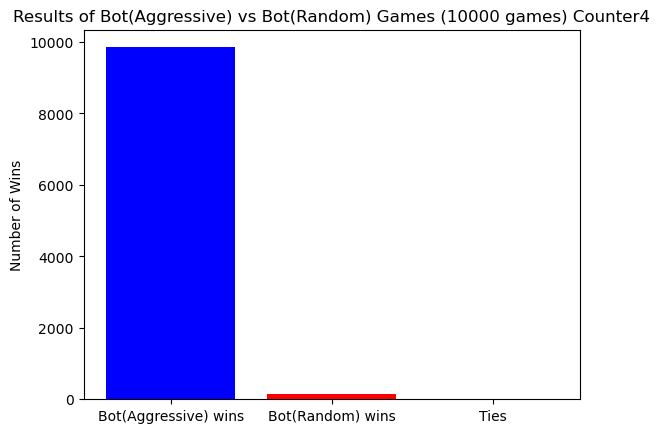

In [39]:
# Simulate
player_wins = {'X': 0, 'O': 0, 'Tie': 0}

run_computer_vs_computer(10000)

#Plot
import matplotlib.pyplot as plt

# Plot the results
labels = ['Bot(Aggressive) wins', 'Bot(Random) wins', 'Ties']
values = [player_wins['X'], player_wins['O'], player_wins['Tie']]

fig, ax = plt.subplots()
ax.bar(labels, values, color=['blue', 'red', 'green'])
ax.set_ylabel('Number of Wins')
ax.set_title('Results of Bot(Aggressive) vs Bot(Random) Games (10000 games) Counter4')

plt.show()

# Bot(Aggressive) vs Bot(Random Inputs) Counter4

In [36]:
import random
def play_game(board, starting_player):
    board = [[' ' for _ in range(7)] for _ in range(6)]
    current_player = 'X'
    count = 0

    while True:
        count+=1
        # Remove the print_board() call to avoid printing the board at each move
        if current_player == 'X':
            col = stack_three_line(board, current_player)
            if col is None:
                col = stack_two_line(board, current_player)
                if col is None:
                    col = block_three_line(board, current_player)
                    if col is None:
                        col = block_two_line(board, current_player)
                        if col is None:
                            col = random.randint(2,5)
        else:
            col = random.randint(0,6)


        drop_piece(board, col, current_player)
        
        if count > 6:
            board = switch_coin(board, current_player)
        
        if check_win(board, current_player):
            return current_player

        if is_board_full(board):
            return 'Tie'
        
        
        current_player = 'O' if current_player == 'X' else 'X'
    
    return None

player_wins = {'X': 0, 'O': 0, 'Tie': 0}




Results after 10000 games:
Player X wins: 7641
Player O wins: 2359
Ties: 0


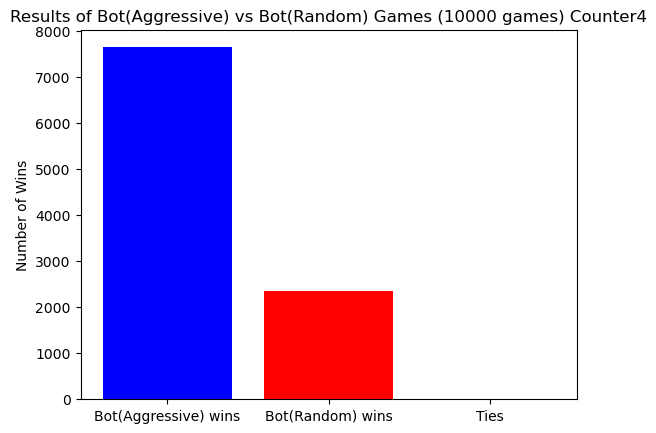

In [37]:
# Simulate
player_wins = {'X': 0, 'O': 0, 'Tie': 0}

run_computer_vs_computer(10000)

#Plot
import matplotlib.pyplot as plt

# Plot the results
labels = ['Bot(Aggressive) wins', 'Bot(Random) wins', 'Ties']
values = [player_wins['X'], player_wins['O'], player_wins['Tie']]

fig, ax = plt.subplots()
ax.bar(labels, values, color=['blue', 'red', 'green'])
ax.set_ylabel('Number of Wins')
ax.set_title('Results of Bot(Aggressive) vs Bot(Random) Games (10000 games) Counter4')

plt.show()

# Simulation of Different Strategies
### Aggressive: Prioritize in placing coins to BUILD their 3 stack or 2 stack
### Defensive: Prioritize in placing coins to BLOCK enemy 3 stack or 2 stack
### Neutral: Prioritize in BLOCKING 3 Stack and BUILDING 3 Stacks

# Bot(Aggressive) vs Bot(Defensive)

In [192]:
import random
def play_game(board, starting_player):
    board = [[' ' for _ in range(7)] for _ in range(6)]
    current_player = 'X'
    count = 0

    while True:
        count+= 1
        # Remove the print_board() call to avoid printing the board at each move
        # print_board(board)

        if current_player == 'X':
            col = stack_three_line(board, current_player)
            if col is None:
                col = stack_two_line(board, current_player)
                if col is None:
                    col = block_three_line(board, current_player)
                    if col is None:
                        col = block_two_line(board, current_player)
                        if col is None:
                            col = random.randint(2,5)
            
        else:
            col = block_three_line(board, current_player)  # Try to block the computer from losing
            if col is None:
                col = block_two_line(board, current_player)  # Try to block the computer from losing
                if col is None:
                    col = stack_three_line(board, current_player)  # Try to stack two for the computer
                    if col is None:
                        col = stack_two_line(board, current_player)  # Try to stack two for the computer
                        if col is None:
                            col = random.randint(0,6)
            


        drop_piece(board, col, current_player)

        if count > 6:
            board = switch_coin(board, current_player)
            
        if check_win(board, current_player):
            return current_player

        if is_board_full(board):
            return 'Tie'
        
        current_player = 'O' if current_player == 'X' else 'X'

    return None

player_wins = {'X': 0, 'O': 0, 'Tie': 0}


Results after 10000 games:
Player X wins: 5511
Player O wins: 4489
Ties: 0


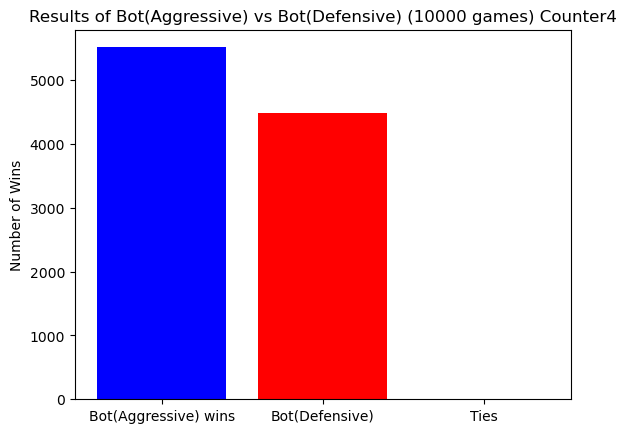

In [193]:
# Simulate
player_wins = {'X': 0, 'O': 0, 'Tie': 0}

run_computer_vs_computer(10000)

#Plot
import matplotlib.pyplot as plt

# Plot the results
labels = ['Bot(Aggressive) wins', 'Bot(Defensive)', 'Ties']
values = [player_wins['X'], player_wins['O'], player_wins['Tie']]

fig, ax = plt.subplots()
ax.bar(labels, values, color=['blue', 'red', 'green'])
ax.set_ylabel('Number of Wins')
ax.set_title('Results of Bot(Aggressive) vs Bot(Defensive) (10000 games) Counter4')

plt.show()

# Bot(Aggressive) vs Bot(Neutral)

In [22]:
import random
def play_game(board, starting_player):
    board = [[' ' for _ in range(7)] for _ in range(6)]
    current_player = 'X'
    count = 0

    while True:
        count += 1
        # Remove the print_board() call to avoid printing the board at each move
        # print_board(board)

        if current_player == 'X':
            col = stack_three_line(board, current_player)
            if col is None:
                col = stack_two_line(board, current_player)
                if col is None:
                    col = block_three_line(board, current_player)
                    if col is None:
                        col = block_two_line(board, current_player)
                        if col is None:
                            col = random.randint(2,5)
        else:
            col = stack_three_line(board, current_player)  # Try to block the computer from losing
            if col is None:
                col = block_three_line(board, current_player)  # Try to block the computer from losing
                if col is None:
                    col = random.randint(0,6)
            

        drop_piece(board, col, current_player)
        if count > 6:
            board = switch_coin(board, current_player)

        if check_win(board, current_player):
            return current_player

        if is_board_full(board):
            return 'Tie'
        
        
        
        current_player = 'O' if current_player == 'X' else 'X'

    return None

player_wins = {'X': 0, 'O': 0, 'Tie': 0}


Results after 10000 games:
Player X wins: 4707
Player O wins: 5293
Ties: 0


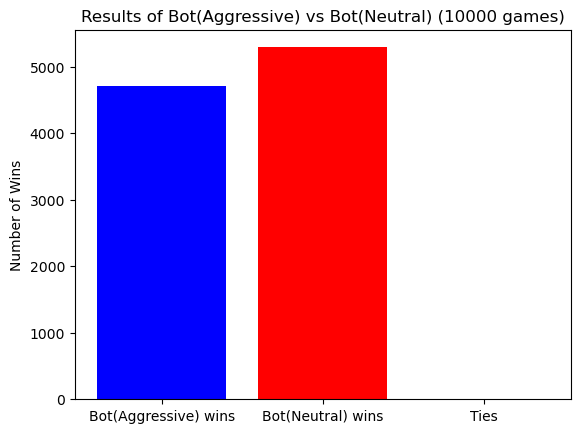

In [23]:
# Simulate
player_wins = {'X': 0, 'O': 0, 'Tie': 0}

run_computer_vs_computer(10000)

#Plot
import matplotlib.pyplot as plt

# Plot the results
labels = ['Bot(Aggressive) wins', 'Bot(Neutral) wins', 'Ties']
values = [player_wins['X'], player_wins['O'], player_wins['Tie']]

fig, ax = plt.subplots()
ax.bar(labels, values, color=['blue', 'red', 'green'])
ax.set_ylabel('Number of Wins')
ax.set_title('Results of Bot(Aggressive) vs Bot(Neutral) (10000 games)')

plt.show()

# Bot(Neutral) vs Bot(Defensive)

In [25]:
import random
def play_game(board, starting_player):
    board = [[' ' for _ in range(7)] for _ in range(6)]
    current_player = 'X'
    count = 0


    while True:
        count+= 1
        # Remove the print_board() call to avoid printing the board at each move
        # print_board(board)

        if current_player == 'X':
            col = stack_three_line(board, current_player)  # Try to block the computer from losing
            if col is None:
                col = block_three_line(board, current_player)  # Try to block the computer from losing
                if col is None:
                    col = random.randint(0,6)
            
        else:
            col = block_three_line(board, current_player)  # Try to block the computer from losing
            if col is None:
                col = block_two_line(board, current_player)  # Try to block the computer from losing
                if col is None:
                    col = stack_three_line(board, current_player)  # Try to stack two for the computer
                    if col is None:
                        col = stack_two_line(board, current_player)  # Try to stack two for the computer
                        if col is None:
                            col = random.randint(0,6)
            


        drop_piece(board, col, current_player)
        if count > 6:
            board = switch_coin(board, current_player)

        if check_win(board, current_player):
            return current_player

        if is_board_full(board):
            return 'Tie'
        
        
        current_player = 'O' if current_player == 'X' else 'X'

    return None

player_wins = {'X': 0, 'O': 0, 'Tie': 0}


Results after 10000 games:
Player X wins: 4528
Player O wins: 5472
Ties: 0


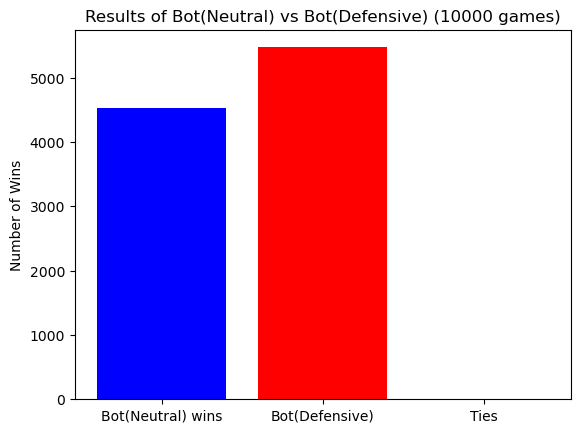

In [26]:
# Simulate
player_wins = {'X': 0, 'O': 0, 'Tie': 0}

run_computer_vs_computer(10000)

#Plot
import matplotlib.pyplot as plt

# Plot the results
labels = ['Bot(Neutral) wins', 'Bot(Defensive)', 'Ties']
values = [player_wins['X'], player_wins['O'], player_wins['Tie']]

fig, ax = plt.subplots()
ax.bar(labels, values, color=['blue', 'red', 'green'])
ax.set_ylabel('Number of Wins')
ax.set_title('Results of Bot(Neutral) vs Bot(Defensive) (10000 games)')

plt.show()